In [152]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('thermoData.csv')

print(data.head())



   Sl.No.  Cr  Ti   V   W  beta_transus  solidus    delta   VEC    BSD  \
0       1  40   0  25  35        962.45  2159.14  1196.69  5.75  0.992   
1       2  45   0  20  35       1063.14  2136.93  1073.79  5.80  1.002   
2       3  15   0  40  45        829.30  2278.59  1449.29  5.60  0.963   
3       4  40   0  15  45       1208.13  2232.42  1024.29  5.85  1.011   
4       5  10   0  50  40        779.23  2190.58  1411.35  5.50  0.944   

   epsilon_p  
0      0.000  
1      0.000  
2      0.000  
3      0.000  
4      3.381  


# Training beta transus temperature

In [153]:
#X = data.iloc[:,]
X=np.array(data.iloc[:,1:5])
y=np.array(data.iloc[:,5])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=1000)
}

models['XGBoost'] = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
models['SVR'] = SVR(kernel='rbf', C=1.0, epsilon=0.1)
models['Neural Network'] = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions1 = model.predict(X_train)
    mse = mean_squared_error(y_test, predictions)
    mse1 = mean_squared_error(y_train, predictions1)
    results[name] = mse
    print(f'{name} MSE: {np.sqrt(mse1)}')

# Optionally, print the best model based on MSE
best_model = min(results, key=results.get)
print(f'Best performing model: {best_model} with MSE: {results[best_model]}')

Linear Regression MSE: 87.59200250546819
Decision Tree MSE: 0.0
Random Forest MSE: 15.825691386787808
XGBoost MSE: 25.74239955005728
SVR MSE: 131.4446257734385
Neural Network MSE: 46.85253474730635
Best performing model: XGBoost with MSE: 904.6854289569312


/Users/piti526/Library/CloudStorage/OneDrive-PNNL/Documents/Projects/Fusion/MPEA/1_Cr-Ti-V-W-Ductility/TriFugures/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Plotting beta transus temperature

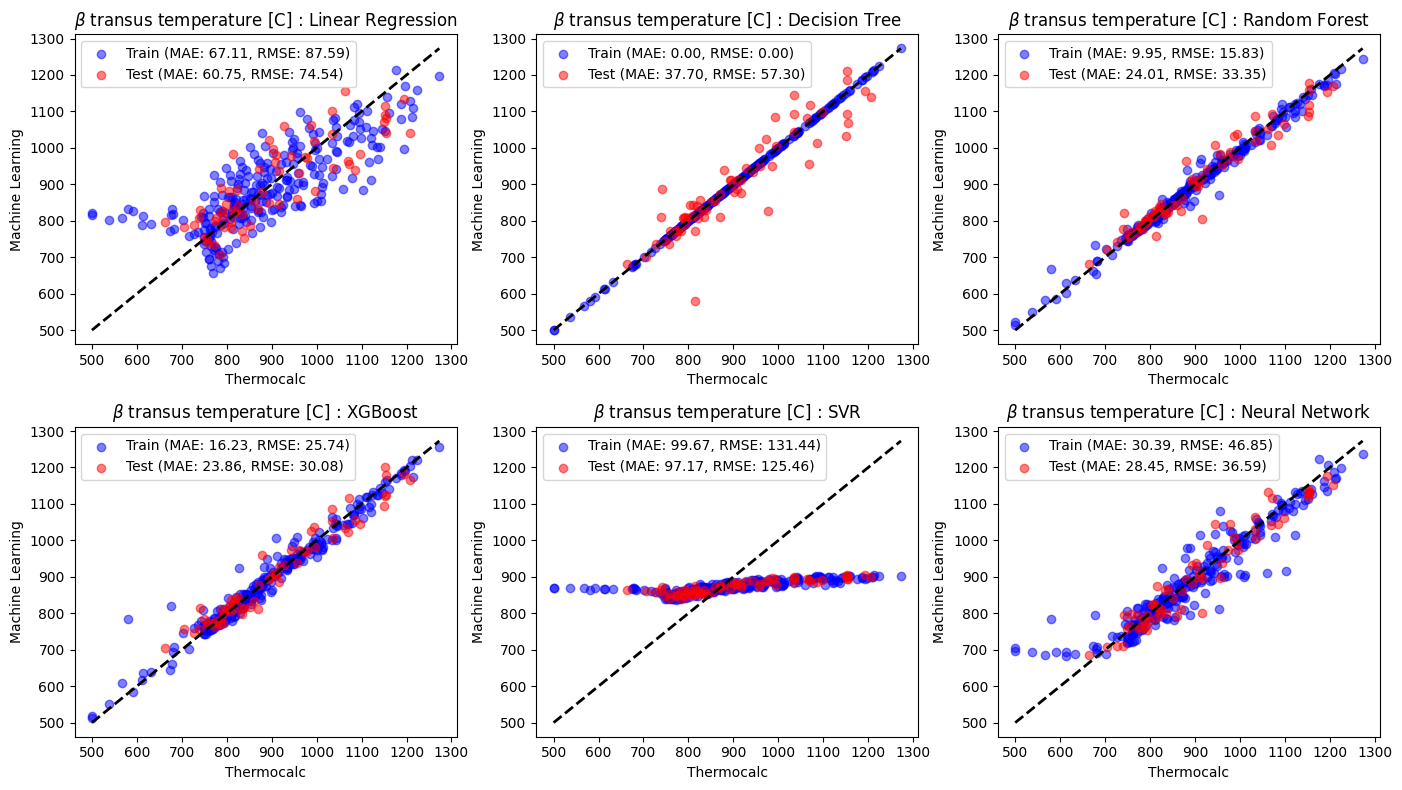

In [ ]:
# Number of models
num_models = len(models)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

axes=axes.flatten()

# Ensure axes is iterable even if there's only one model
if num_models == 1:
    axes = [axes]

# Scatter plot for each model
for ax, (name, model) in zip(axes, models.items()):
    # Predictions on training data
    predictions_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, predictions_train)  
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

    # Predictions on test data
    predictions_test = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, predictions_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

    # Scatter plots
    ax.scatter(y_train, predictions_train, label=f"Train (MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f})", alpha=0.5, color='blue')
    ax.scatter(y_test, predictions_test, label=f"Test (MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f})", alpha=0.5, color='red')

    # Plot the perfect prediction line (y = x)
    min_val = min(y_train.min(), y_test.min())
    max_val = max(y_train.max(), y_test.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='--', linewidth=2)

    # Labels and title
    ax.set_xlabel("Thermocalc")
    ax.set_ylabel("Machine Learning")
    ax.set_title(f"$\\beta$ transus temperature [C] : {name}")
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Training melting temperature

In [155]:
#X = data.iloc[:,]
X=np.array(data.iloc[:,1:5])
y=np.array(data.iloc[:,6])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=1000)
}

models['XGBoost'] = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
models['SVR'] = SVR(kernel='rbf', C=1.0, epsilon=0.1)
models['Neural Network'] = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions1 = model.predict(X_train)
    mse = mean_squared_error(y_test, predictions)
    mse1 = mean_squared_error(y_train, predictions1)
    results[name] = mse
    print(f'{name} MSE: {np.sqrt(mse1)}')

# Optionally, print the best model based on MSE
best_model = min(results, key=results.get)
print(f'Best performing model: {best_model} with MSE: {results[best_model]}')

Linear Regression MSE: 82.24434529417124
Decision Tree MSE: 0.0
Random Forest MSE: 10.824240161656052
XGBoost MSE: 12.651947820043462
SVR MSE: 252.3273801586078
Neural Network MSE: 66.07163676939649
Best performing model: XGBoost with MSE: 383.4358246974974


/Users/piti526/Library/CloudStorage/OneDrive-PNNL/Documents/Projects/Fusion/MPEA/1_Cr-Ti-V-W-Ductility/TriFugures/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# plotting of melting temperature

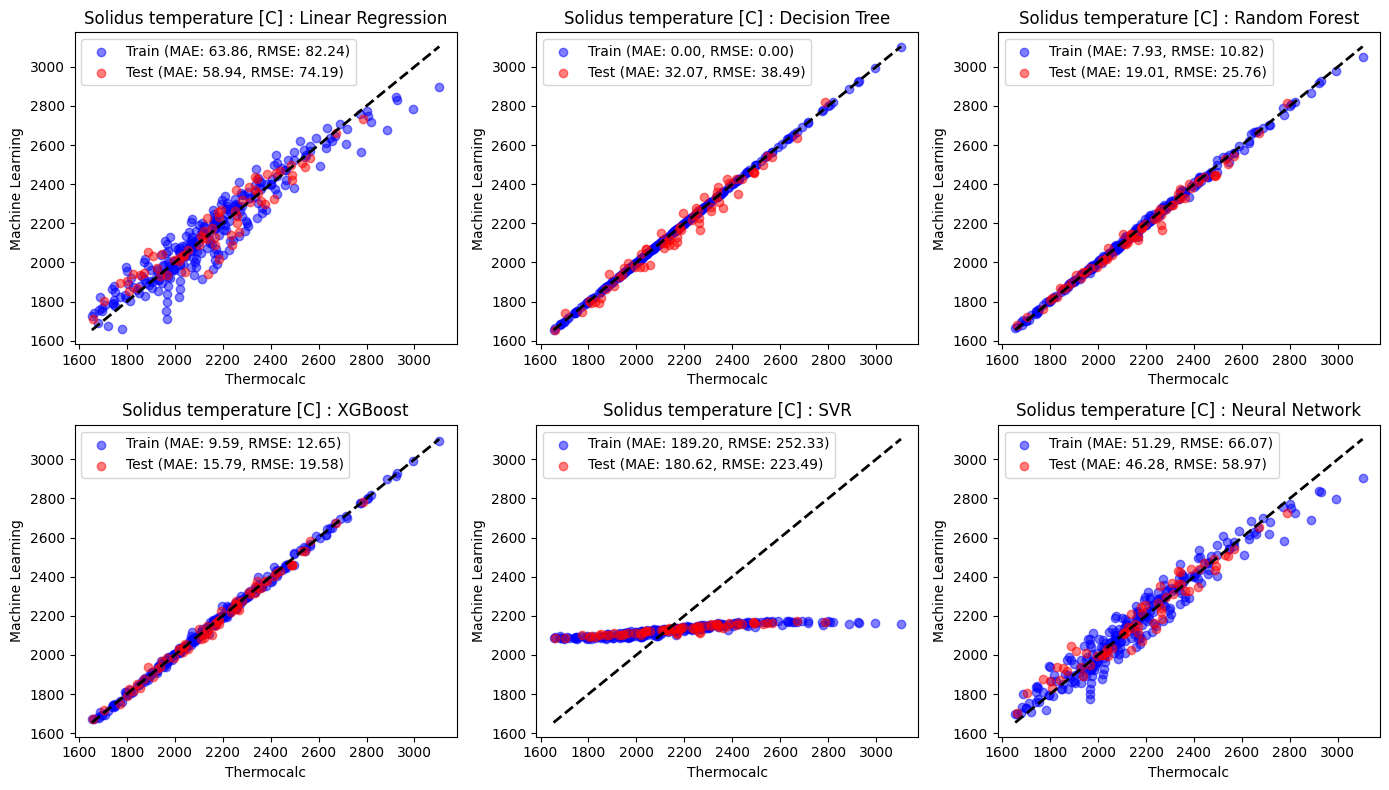

In [156]:
# Number of models
num_models = len(models)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

axes=axes.flatten()

# Ensure axes is iterable even if there's only one model
if num_models == 1:
    axes = [axes]

# Scatter plot for each model
for ax, (name, model) in zip(axes, models.items()):
    # Predictions on training data
    predictions_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, predictions_train)  
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

    # Predictions on test data
    predictions_test = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, predictions_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

    # Scatter plots
    ax.scatter(y_train, predictions_train, label=f"Train (MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f})", alpha=0.5, color='blue')
    ax.scatter(y_test, predictions_test, label=f"Test (MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f})", alpha=0.5, color='red')

    # Plot the perfect prediction line (y = x)
    min_val = min(y_train.min(), y_test.min())
    max_val = max(y_train.max(), y_test.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='--', linewidth=2)

    # Labels and title
    ax.set_xlabel("Thermocalc")
    ax.set_ylabel("Machine Learning")
    ax.set_title(f"Solidus temperature [C] : {name}")
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# training of delta T

In [157]:
#X = data.iloc[:,]
X=np.array(data.iloc[:,1:5])
y=np.array(data.iloc[:,7])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=1000)
}

models['XGBoost'] = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
models['SVR'] = SVR(kernel='rbf', C=1.0, epsilon=0.1)
models['Neural Network'] = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions1 = model.predict(X_train)
    mse = mean_squared_error(y_test, predictions)
    mse1 = mean_squared_error(y_train, predictions1)
    results[name] = mse
    print(f'{name} MSE: {np.sqrt(mse1)}')

# Optionally, print the best model based on MSE
best_model = min(results, key=results.get)
print(f'Best performing model: {best_model} with MSE: {results[best_model]}')

Linear Regression MSE: 136.3871100040359
Decision Tree MSE: 0.0
Random Forest MSE: 20.694025620859758
XGBoost MSE: 26.11355261370225
SVR MSE: 332.7881326350503
Neural Network MSE: 64.3990016110601
Best performing model: XGBoost with MSE: 1380.6337528722945


/Users/piti526/Library/CloudStorage/OneDrive-PNNL/Documents/Projects/Fusion/MPEA/1_Cr-Ti-V-W-Ductility/TriFugures/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# plotting of delta T

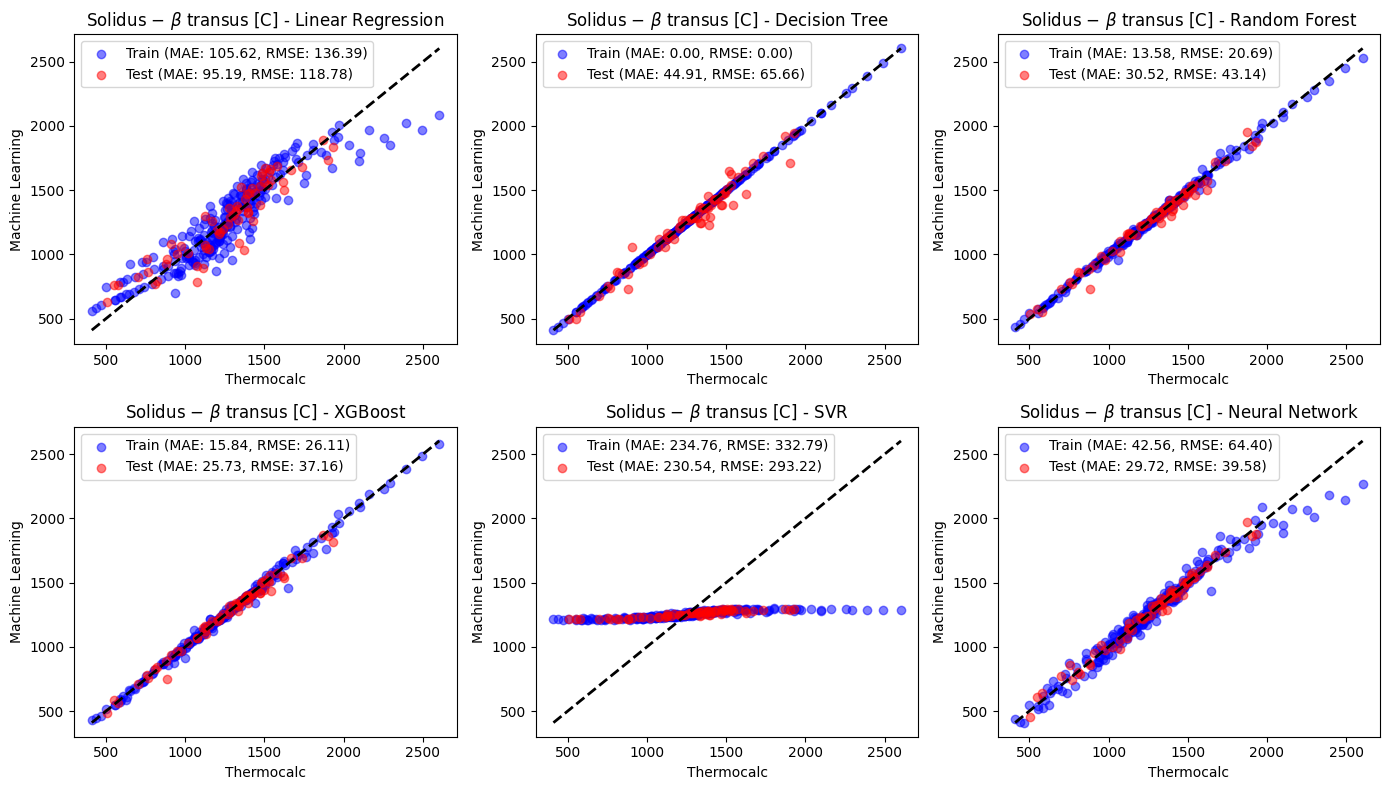

In [158]:
# Number of models
num_models = len(models)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

axes=axes.flatten()

# Ensure axes is iterable even if there's only one model
if num_models == 1:
    axes = [axes]

# Scatter plot for each model
for ax, (name, model) in zip(axes, models.items()):
    # Predictions on training data
    predictions_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, predictions_train)  
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

    # Predictions on test data
    predictions_test = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, predictions_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

    # Scatter plots
    ax.scatter(y_train, predictions_train, label=f"Train (MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f})", alpha=0.5, color='blue')
    ax.scatter(y_test, predictions_test, label=f"Test (MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f})", alpha=0.5, color='red')

    # Plot the perfect prediction line (y = x)
    min_val = min(y_train.min(), y_test.min())
    max_val = max(y_train.max(), y_test.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='--', linewidth=2)

    # Labels and title
    ax.set_xlabel("Thermocalc")
    ax.set_ylabel("Machine Learning")
    ax.set_title(f"Solidus $- ~\\beta$ transus [C] - {name}")
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# improving the model using metallic radius

In [161]:
#X = data.iloc[:,]
X=np.array(data.iloc[:,1:5])
y=np.array(data.iloc[:,5])

metallicRadii=np.transpose([[1.28,1.47,1.34,1.39]])
average_metallicRadius=np.matmul(X,metallicRadii)/100
#print(average_metallicRadius)

latMismatch=[]
for i, xi in enumerate(X):
    sum=0
    for j, cj in enumerate(xi):
        sum+=cj*(1-metallicRadii[j]/average_metallicRadius[i])**2
    latMismatch.append(100*np.sqrt(sum/100))
latMismatch = np.array(latMismatch)
#print(latMismatch)



X = np.hstack((X, average_metallicRadius, latMismatch))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=1000)
}

models['XGBoost'] = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
models['SVR'] = SVR(kernel='rbf', C=1.0, epsilon=0.1)
models['Neural Network'] = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions1 = model.predict(X_train)
    mse = mean_squared_error(y_test, predictions)
    mse1 = mean_squared_error(y_train, predictions1)
    results[name] = mse
    print(f'{name} MSE: {np.sqrt(mse1)}')

# Optionally, print the best model based on MSE
best_model = min(results, key=results.get)
print(f'Best performing model: {best_model} with MSE: {results[best_model]}')

Linear Regression MSE: 87.543919052598
Decision Tree MSE: 0.0
Random Forest MSE: 16.742617248672502
XGBoost MSE: 20.53407602477659
SVR MSE: 132.87314184908604
Neural Network MSE: 60.725037307756025
Best performing model: XGBoost with MSE: 957.3602558426796


/Users/piti526/Library/CloudStorage/OneDrive-PNNL/Documents/Projects/Fusion/MPEA/1_Cr-Ti-V-W-Ductility/TriFugures/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


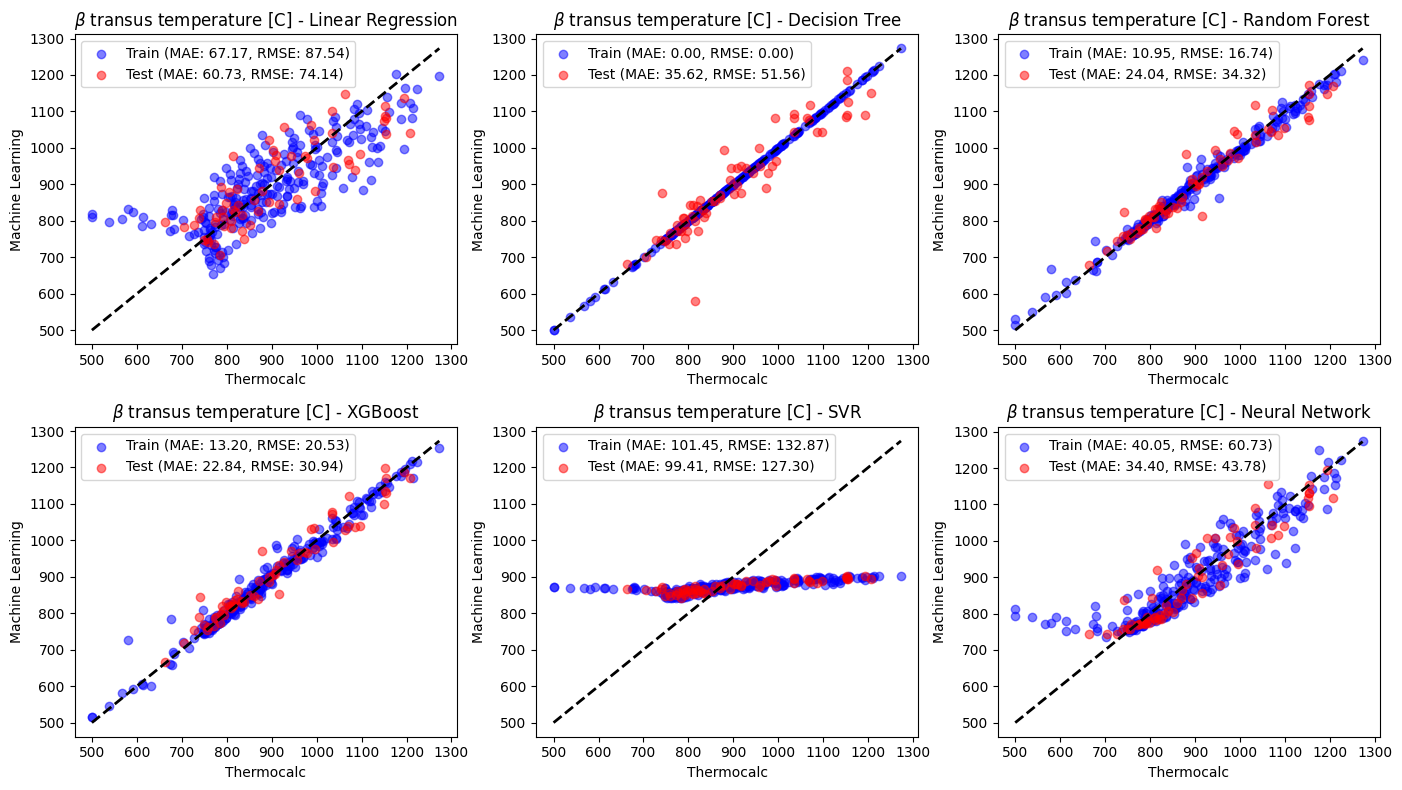

In [163]:
# Number of models
num_models = len(models)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

axes=axes.flatten()

# Ensure axes is iterable even if there's only one model
if num_models == 1:
    axes = [axes]

# Scatter plot for each model
for ax, (name, model) in zip(axes, models.items()):
    # Predictions on training data
    predictions_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, predictions_train)  
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

    # Predictions on test data
    predictions_test = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, predictions_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

    # Scatter plots
    ax.scatter(y_train, predictions_train, label=f"Train (MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f})", alpha=0.5, color='blue')
    ax.scatter(y_test, predictions_test, label=f"Test (MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f})", alpha=0.5, color='red')

    # Plot the perfect prediction line (y = x)
    min_val = min(y_train.min(), y_test.min())
    max_val = max(y_train.max(), y_test.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='--', linewidth=2)

    # Labels and title
    ax.set_xlabel("Thermocalc")
    ax.set_ylabel("Machine Learning")
    ax.set_title(f"$\\beta$ transus temperature [C] - {name}")
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()